# Concrete Strength Prediction

In [1]:
# Importing required libraries
import io
import os
import numpy as np # linear algebra
import pandas as pd # importing files and data pre-processing
import tensorflow as tf 
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd "D:\Imarticus\Deep Learning and AI\LMS\ANN Project\Dataset"

D:\Imarticus\Deep Learning and AI\LMS\ANN Project\Dataset


In [3]:
concrete=pd.read_csv("concrete_data.csv") # Import file

In [4]:
# Find the shape of the dataset
concrete.shape

(1030, 9)

In [5]:
# Get Top 5 rows of the dataset
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# Get Last 5 rows of the datset
concrete.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [7]:
# Find the datatypes of the given columns
concrete.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [8]:
# Find the
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


# Exploratory Data Analysis(EDA)

In [9]:
# Get the summary of the dataset
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
# Get the unique values of the cement
concrete.Cement.unique()

array([540. , 332.5, 198.6, 266. , 380. , 475. , 427.5, 190. , 304. ,
       139.6, 342. , 237.5, 349. , 310. , 485. , 374. , 313.3, 425. ,
       375. , 469. , 388.6, 531.3, 318.8, 401.8, 362.6, 323.7, 379.5,
       286.3, 439. , 389.9, 337.9, 222.4, 233.8, 194.7, 190.7, 212.1,
       230. , 190.3, 166.1, 168. , 213.7, 213.8, 229.7, 238.1, 250. ,
       212.5, 212.6, 212. , 231.8, 251.4, 181.4, 182. , 168.9, 290.4,
       277.1, 295.7, 251.8, 249.1, 252.3, 246.8, 275.1, 297.2, 213.5,
       277.2, 218.2, 214.9, 218.9, 376. , 500. , 315. , 505. , 451. ,
       516. , 520. , 528. , 385. , 500.1, 450.1, 397. , 333. , 334. ,
       405. , 200. , 145. , 160. , 234. , 285. , 356. , 275. , 165. ,
       178. , 167.4, 172.4, 173.5, 167. , 173.8, 446. , 387. , 355. ,
       491. , 424. , 202. , 284. , 359. , 436. , 289. , 393. , 480. ,
       255. , 158.8, 239.6, 238.2, 181.9, 193.5, 255.5, 272.8, 220.8,
       382.5, 210.7, 295.8, 203.5, 381.4, 228. , 316.1, 135.7, 339.2,
       290.2, 170.3,

In [11]:
# Find the average value of the cement column
concrete.Cement.mean()

281.16786407766995

In [12]:
# Find the unique values of the Blast Furnace
concrete['Blast Furnace Slag'].unique()

array([  0. , 142.5, 132.4, 114. ,  95. ,  47.5, 190. ,  76. , 209.4,
        38. , 237.5, 189.2, 262.2, 106.3,  93.8, 118.8, 117.2,  97.1,
       212.5,  94.7, 189. , 282.8, 151.2, 200.9, 177. ,  42.1,  98.1,
        45.2,  42.2,  97.8,  54.6,  53.8, 137. ,  50. ,  17.2,  17.5,
        17.6, 200. , 116. , 128. , 156. , 180. , 119. , 128.5, 129.8,
       129.9,  13.6,  50.1,  75.4,  93.4,  24. ,  20. ,  19. ,  26. ,
        22. ,  11. ,  15. , 238.2, 359.4, 158.8, 272.8, 290.2, 170.3,
       181.9, 147.2, 316.1, 135.7, 342.1, 210.7, 203.5, 193.5, 155.5,
       124.1, 305.3, 166.8, 236. , 212. , 250.2, 183.9, 122.6, 153. ,
       133. , 162.4, 173. , 288. , 102. , 192. , 157. , 141.3, 105. ,
       144. , 115. , 178. , 143. , 140. , 149. , 239. , 167. , 164. ,
       187. , 129. ,  97. , 243. , 188. , 121. , 166. , 207. , 111. ,
       250. , 260. , 139. , 100. ,  92. , 183. , 230. , 210. , 145. ,
       118. , 169. , 101. , 161. , 120. , 237. , 170. , 112. , 136. ,
       117. , 184. ,

In [13]:
# Average vlaue of the blast furnace
concrete['Blast Furnace Slag'].mean()

73.89582524271846

In [14]:
# Find the unique values of ash column
concrete['Fly Ash'].unique()

array([  0. ,  96.7,  94.6, 100.5, 125.4, 121.6, 118.3, 125.2, 163.3,
       163.8,  24.5, 118.2,  94.1,  95.7, 100.4, 124.8, 167. , 122. ,
       124.3,  96.2,  97.4,  95.6,  99.9,  98.8, 125.1, 121.4, 117.5,
       174.7, 174.2, 123.8, 121.9, 124.1,  59. ,  60. , 136. , 158. ,
       163. , 119. ,  95. , 120. , 143.6, 132.1, 118.6, 128.6, 172.4,
       173.5, 159.9,  79. ,  94. ,  97. , 123. , 132. , 141. ,  82. ,
       148. , 112. ,  89. , 139. , 111. , 175. , 116. , 100. , 184. ,
       130. , 107. ,  76. , 150. , 146. , 126. , 142. , 161. , 200. ,
       113. , 128. ,  86. ,  90. , 109. ,  78. ,  71. , 103. , 137. ,
       138. , 195. , 185. ,  92. , 143. , 134. , 133. , 166. ,  87. ,
       106. , 182. ,  91. , 179. ,  77. , 172. ,  98. , 164. , 152. ,
       194. , 193. , 190. , 187. ,  71.5, 106.7, 111.9, 103.3, 119.8,
       136.6, 137.9,  86.1, 194.9, 185.3,  89.6,  91.7, 142.7,  78.4,
       133.6, 132.6, 142.8, 165.7,  87.5, 113.2, 106.2, 182.1, 107.5,
       143.2, 178.9,

In [15]:
concrete['Fly Ash'].mean()

54.18834951456311

In [16]:
concrete.Water.unique()

array([162. , 228. , 192. , 146. , 170.1, 175.5, 153.5, 151.4, 126.6,
       181.1, 137.8, 157.9, 141.8, 155.7, 147.4, 164.9, 183.8, 153.9,
       144.7, 186. , 145.9, 174.9, 189.3, 197.9, 165.6, 162.1, 180.3,
       195.5, 161.9, 176.5, 121.8, 181.7, 195.2, 186.7, 187.4, 159.3,
       159.4, 159. , 174. , 188.5, 169.6, 170.2, 158.3, 168.1, 160.6,
       171.5, 146.1, 158.1, 146.3, 143.3, 159.5, 174.8, 154.8, 154.6,
       160.7, 140.8, 155.6, 158.5, 214.6, 140. , 142. , 145. , 195. ,
       165. , 170. , 185. , 175. , 158. , 200. , 167. , 189. , 190. ,
       184. , 182. , 163. , 160. , 151. , 163.8, 175.1, 179.9, 156.8,
       164.8, 164. , 172.3, 166.6, 191.8, 159.2, 192.9, 157. , 210. ,
       201. , 178. , 168. , 206. , 179. , 154. , 218. , 185.7, 197. ,
       194. , 193. , 191. , 198. , 180. , 181. , 183. , 187. , 203.5,
       173. , 203. , 220. , 202. , 214. , 196. , 172. , 188. , 237. ,
       177. , 176. , 247. , 221. , 212. , 199. , 171. , 127. , 216. ,
       213. , 246.9,

In [17]:
concrete.Water.mean()

181.56728155339806

In [18]:
concrete.Superplasticizer.unique()

array([ 2.5,  0. , 10.1,  8.6, 16.5, 18.6, 23.4,  8.9, 32.2, 12.1, 28.2,
       14.3, 11.4, 11.6, 10.3, 15.9, 11.2, 11.1, 22. ,  9.5,  4.5,  4.6,
        7.5,  7.8,  5.7,  9.9,  6.9,  6.7,  6.1,  7. ,  5.5,  8.7, 10.4,
        5.8,  6.4,  7.6,  8.2, 10.8,  9.4, 11.8, 12.4, 12.8, 14.2, 12. ,
       10.2, 11.7, 11.9,  9.6, 11.3,  4. ,  1.9,  5.9,  5.2, 20. ,  3. ,
       20.8, 17.9, 15.3,  8.3,  9. ,  8.1,  3.6,  4.1,  6.5,  7.9,  9.7,
        5.3, 13.9, 13.1, 12.3,  3.9,  8.5,  1.7, 10.9, 19. , 10. , 18. ,
        6. , 15. , 11. ,  5. ,  8. , 13. , 16. ,  2. ,  9.1,  3.4, 10.5,
        3.1,  7.4, 12.6, 16.1, 15.6, 10.6,  7.1,  8.4,  7.2,  9.2,  2.2,
       18.8,  8.8, 18.3, 22.1,  6.2,  6.3,  9.8,  6.6, 10.7, 11.5, 12.2,
       12.7])

In [19]:
concrete.Superplasticizer.mean()

6.204660194174758

In [20]:
concrete['Coarse Aggregate'].unique()

array([1040. , 1055. ,  932. ,  978.4, 1047. ,  971. , 1120. ,  926.1,
       1046.9,  852.1,  936. ,  946.8,  944.7,  942.7, 1134.3, 1004.6,
        884.9,  967.1,  947. , 1006.4, 1090. , 1057.6, 1029.4, 1088.1,
       1058.6, 1058.7, 1065.8, 1066. , 1028.1,  949.9,  956.9, 1007.8,
       1003.8, 1085.4, 1056.4, 1028.4, 1055.6, 1059.4, 1080.8,  961.2,
        973.9,  955.1, 1006. ,  987.8, 1086.8, 1053.6, 1022.8, 1053.5,
       1052.3, 1061.7, 1075.7, 1014.3, 1078.7, 1003.5,  966. , 1098. ,
       1130. , 1030. ,  801. ,  855. ,  920. ,  870. ,  903. , 1124.4,
        967. ,  996. , 1145. ,  833. ,  824. ,  981. ,  860. , 1044. ,
       1031. , 1061. ,  830. , 1033. , 1005.6, 1005.8, 1007.3, 1006.3,
       1006.2, 1007.2, 1079. ,  948.9, 1043.6,  998. ,  938. ,  882. ,
        822. ,  942. ,  842. ,  838.4,  913.2,  940.6,  936.2,  931.2,
        889.8, 1040.6,  941.6, 1012.4,  998.2, 1026.6, 1047.8,  977. ,
       1091.4, 1076.2, 1104.6,  955.8, 1118.8, 1069.2, 1083.4, 1111.6,
      

In [21]:
concrete['Coarse Aggregate'].mean()

972.9189320388349

In [22]:
concrete['Fine Aggregate'].unique()

array([676. , 594. , 825.5, 670. , 806.9, 850.6, 800. , 756.7, 611.8,
       887.1, 803.7, 992.6, 781.5, 840.5, 925.7, 893.7, 880.4, 852.1,
       755.8, 659.9, 605. , 707.9, 870.3, 852.2, 905.9, 804. , 779.3,
       758.6, 802.6, 780.1, 785.4, 785.5, 757.6, 847. , 861.2, 903.6,
       903.8, 799.5, 778.5, 757.7, 777.8, 780.7, 796.2, 865. , 875.6,
       859.2, 899.8, 889. , 800.9, 777.5, 753.5, 776.4, 775.5, 782.5,
       792.7, 780.6, 794.9, 762.4, 853. , 641. , 745. , 630. , 802. ,
       855. , 720. , 805. , 768. , 613.2, 633. , 652. , 695. , 660. ,
       880. , 879. , 760. , 662. , 685. , 657. , 765. , 655. , 900.9,
       746.6, 746.8, 856.4, 793.5, 770.1, 798.9, 857.2, 771.9, 901.8,
       754.3, 712. , 845. , 871. , 699. , 750. , 801. , 719.7, 895.3,
       785.6, 712.2, 842.6, 945. , 734.3, 664.3, 714.3, 704.3, 724.3,
       744.3, 739.3, 689.3, 769.3, 759.3, 784.3, 674.3, 789.3, 764.3,
       781. , 885. , 856. , 863. , 812. , 833. , 783. , 808. , 795. ,
       758. , 820. ,

In [23]:
concrete['Fine Aggregate'].mean()

773.5804854368932

In [24]:
concrete.Age.unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

In [25]:
concrete.Age.value_counts()

Age
28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

In [26]:
concrete.Strength.unique()

array([79.99, 61.89, 40.27, 41.05, 44.3 , 47.03, 43.7 , 36.45, 45.85,
       39.29, 38.07, 28.02, 43.01, 42.33, 47.81, 52.91, 39.36, 56.14,
       40.56, 42.62, 41.84, 28.24,  8.06, 44.21, 52.52, 53.3 , 41.15,
       52.12, 37.43, 38.6 , 55.26, 41.72, 42.13, 53.69, 38.41, 30.08,
       37.72, 42.23, 36.25, 50.46, 39.  , 53.1 , 41.54, 35.08, 15.05,
       40.76, 26.26, 32.82, 39.78, 46.93, 33.12, 49.19, 14.59, 14.64,
       41.93,  9.13, 50.95, 33.02, 54.38, 51.73,  9.87, 50.66, 48.7 ,
       55.06, 44.7 , 30.28, 40.86, 71.99, 34.4 , 28.8 , 33.4 , 36.3 ,
       29.  , 37.8 , 40.2 , 28.1 , 41.3 , 25.2 , 41.1 , 35.3 , 28.3 ,
       28.6 , 24.4 , 39.3 , 40.6 , 24.1 , 46.2 , 42.8 , 49.2 , 46.8 ,
       45.7 , 55.6 , 54.9 , 34.9 , 46.9 , 54.1 , 55.9 , 49.8 , 47.1 ,
       38.  , 56.1 , 59.09, 22.9 , 35.1 , 61.09, 59.8 , 60.29, 61.8 ,
       56.7 , 68.3 , 66.9 , 50.7 , 56.4 , 55.5 , 68.5 , 71.3 , 74.7 ,
       52.2 , 67.7 , 66.  , 74.5 , 49.9 , 63.4 , 64.9 , 64.3 , 60.2 ,
       72.3 , 69.3 ,

In [27]:
concrete.Strength.mean()

35.817961165048544

# Data Visualization

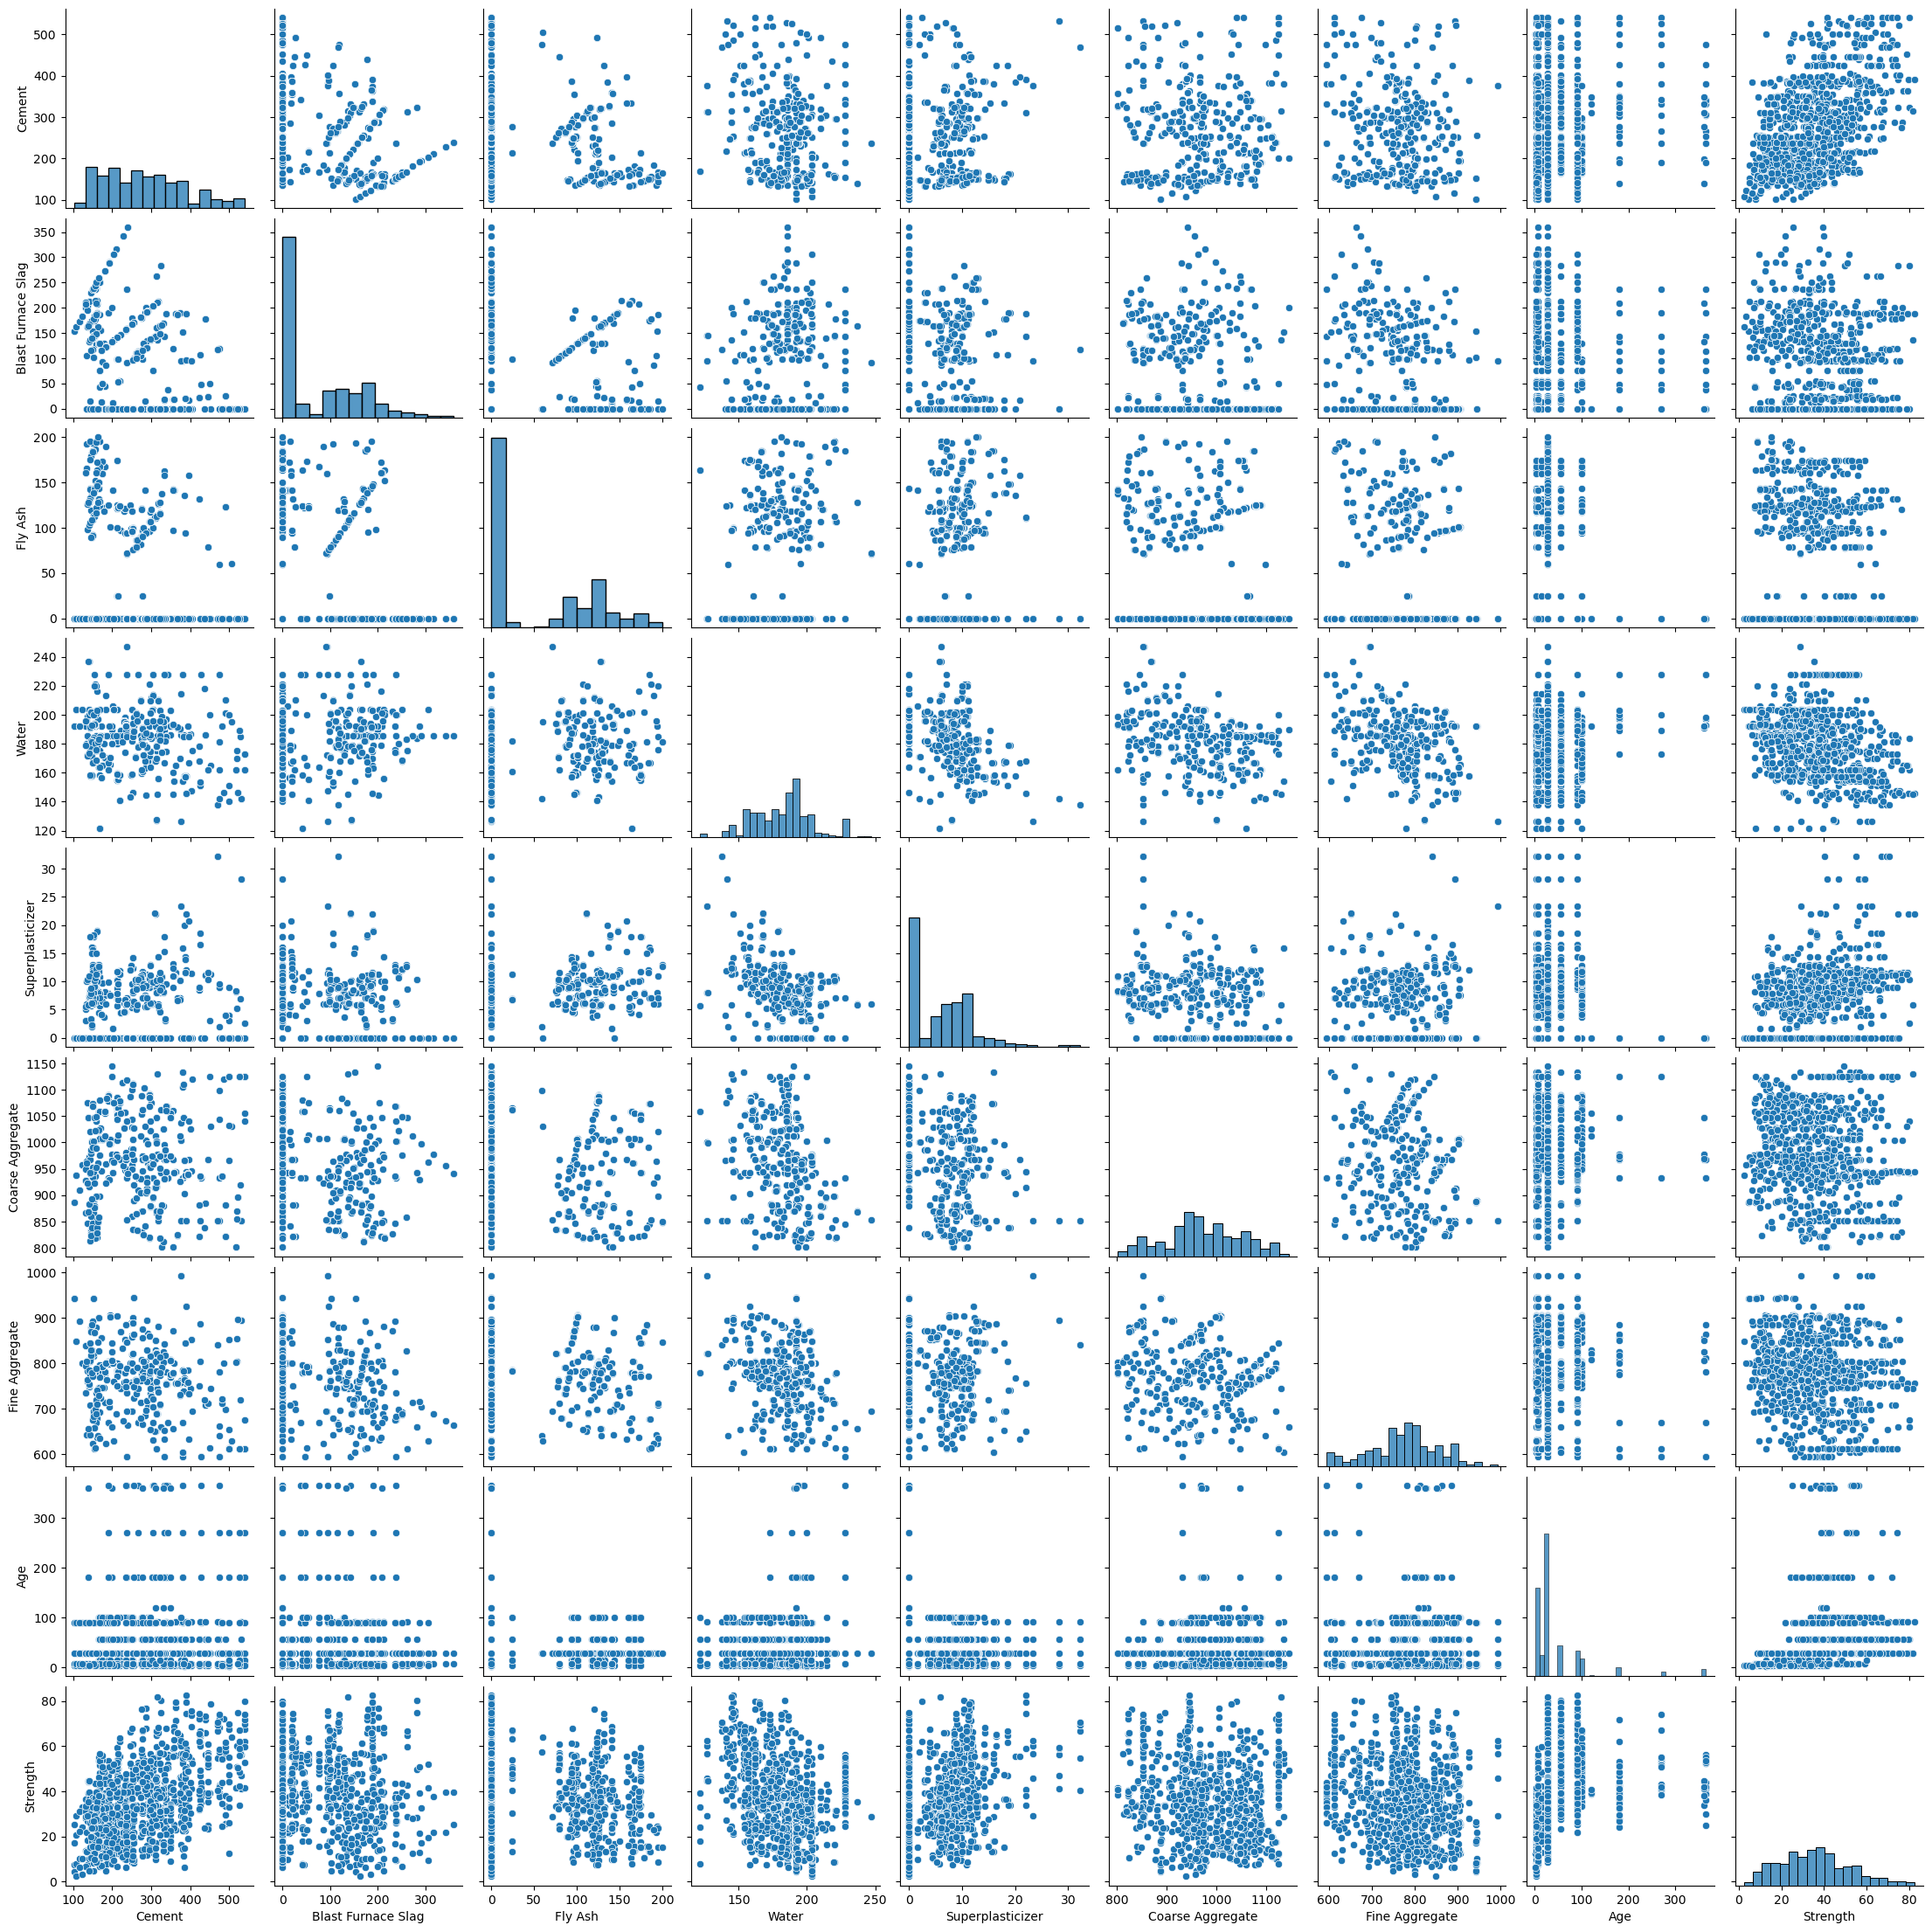

In [28]:
sns.pairplot(concrete)

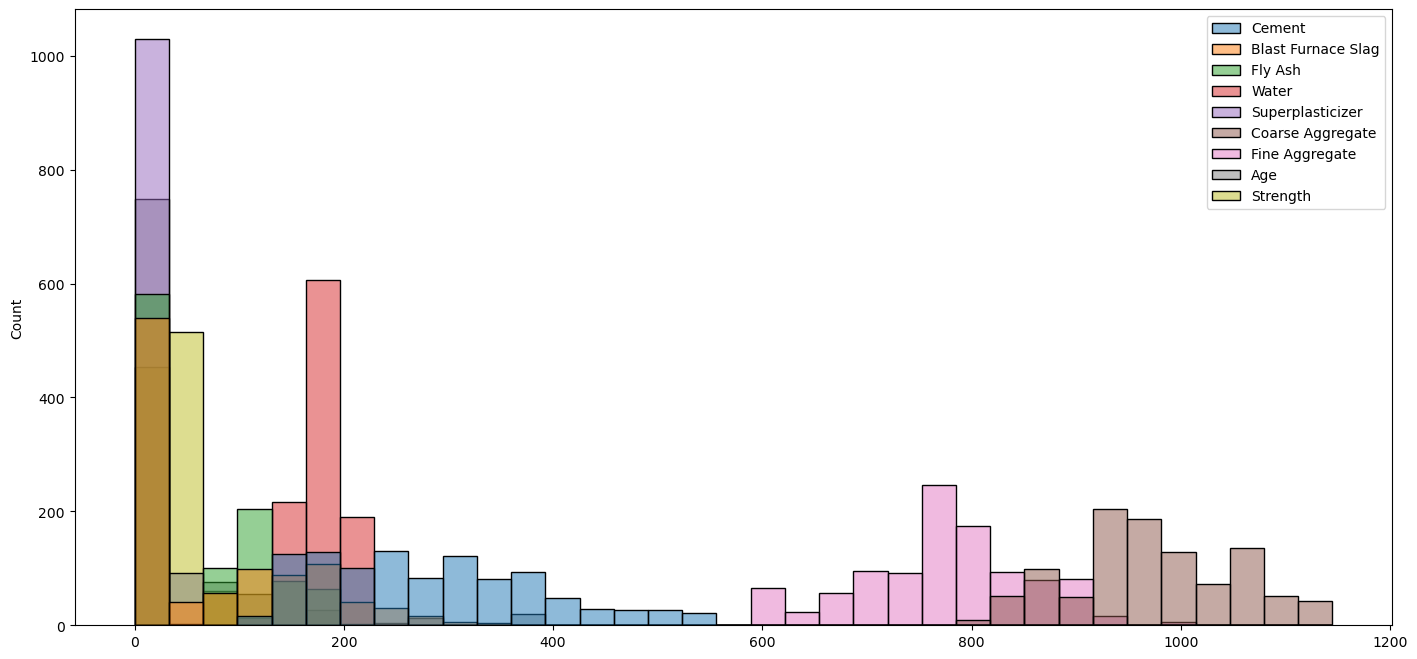

In [29]:
plt.figure(figsize=[17,8])
sns.histplot(concrete)
plt.show()

### Scatter plot

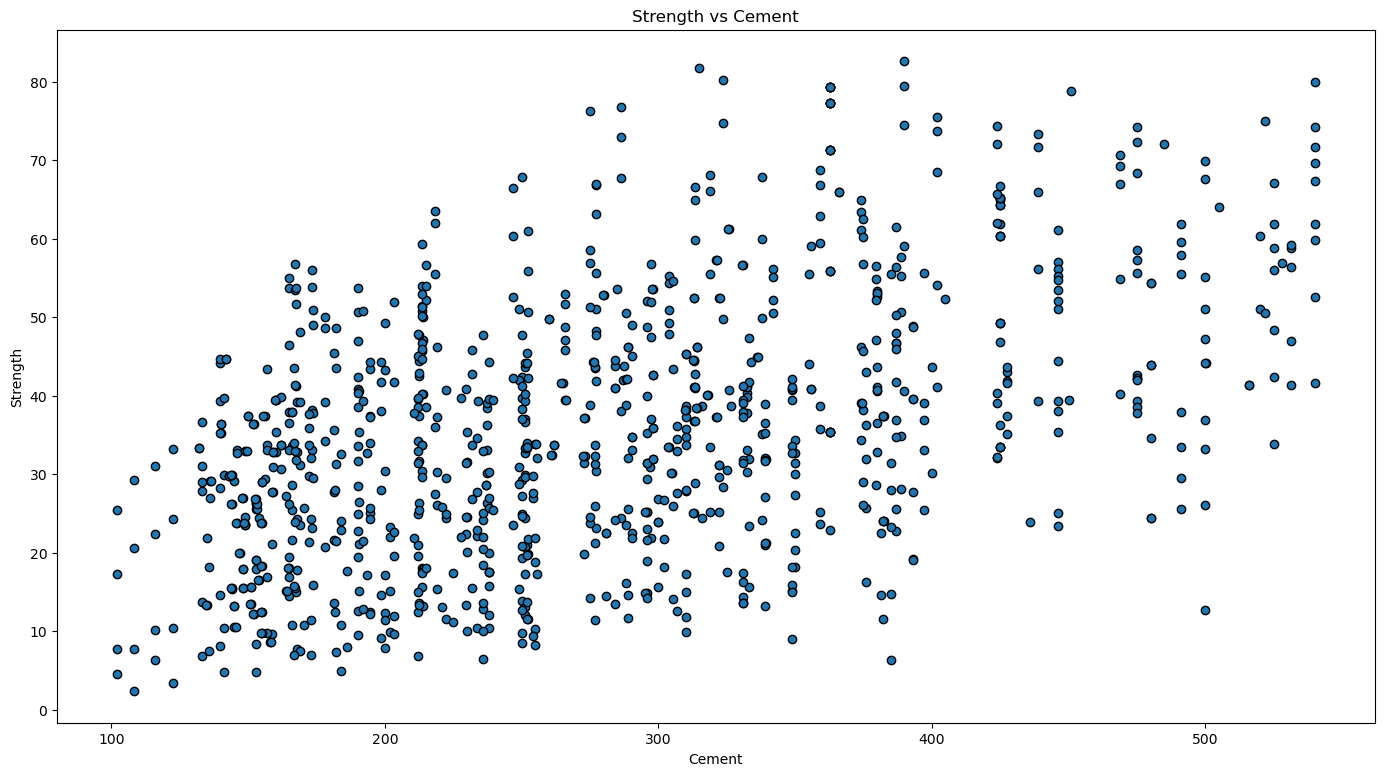

In [30]:
# scatter plot of Water and Cement
plt.figure(figsize=[17,9])
plt.scatter(y='Strength',x='Cement',edgecolors='black',data=concrete)
plt.title('Strength vs Cement')
plt.ylabel('Strength')
plt.xlabel('Cement')
plt.show()

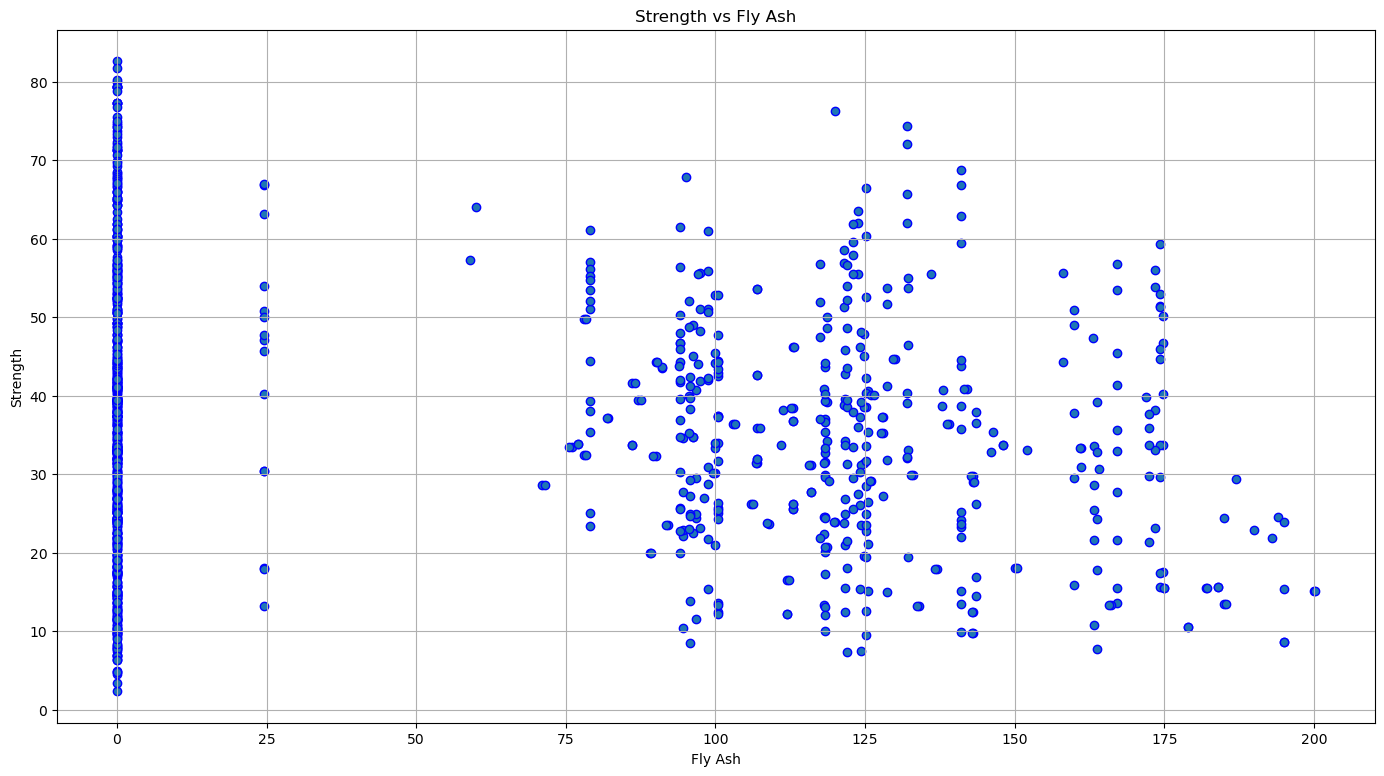

In [31]:
plt.figure(figsize=[17,9])
plt.scatter(y='Strength',x='Fly Ash',edgecolors='blue',data=concrete)
plt.title('Strength vs Fly Ash')
plt.ylabel('Strength')
plt.xlabel('Fly Ash')
plt.grid()
plt.show()

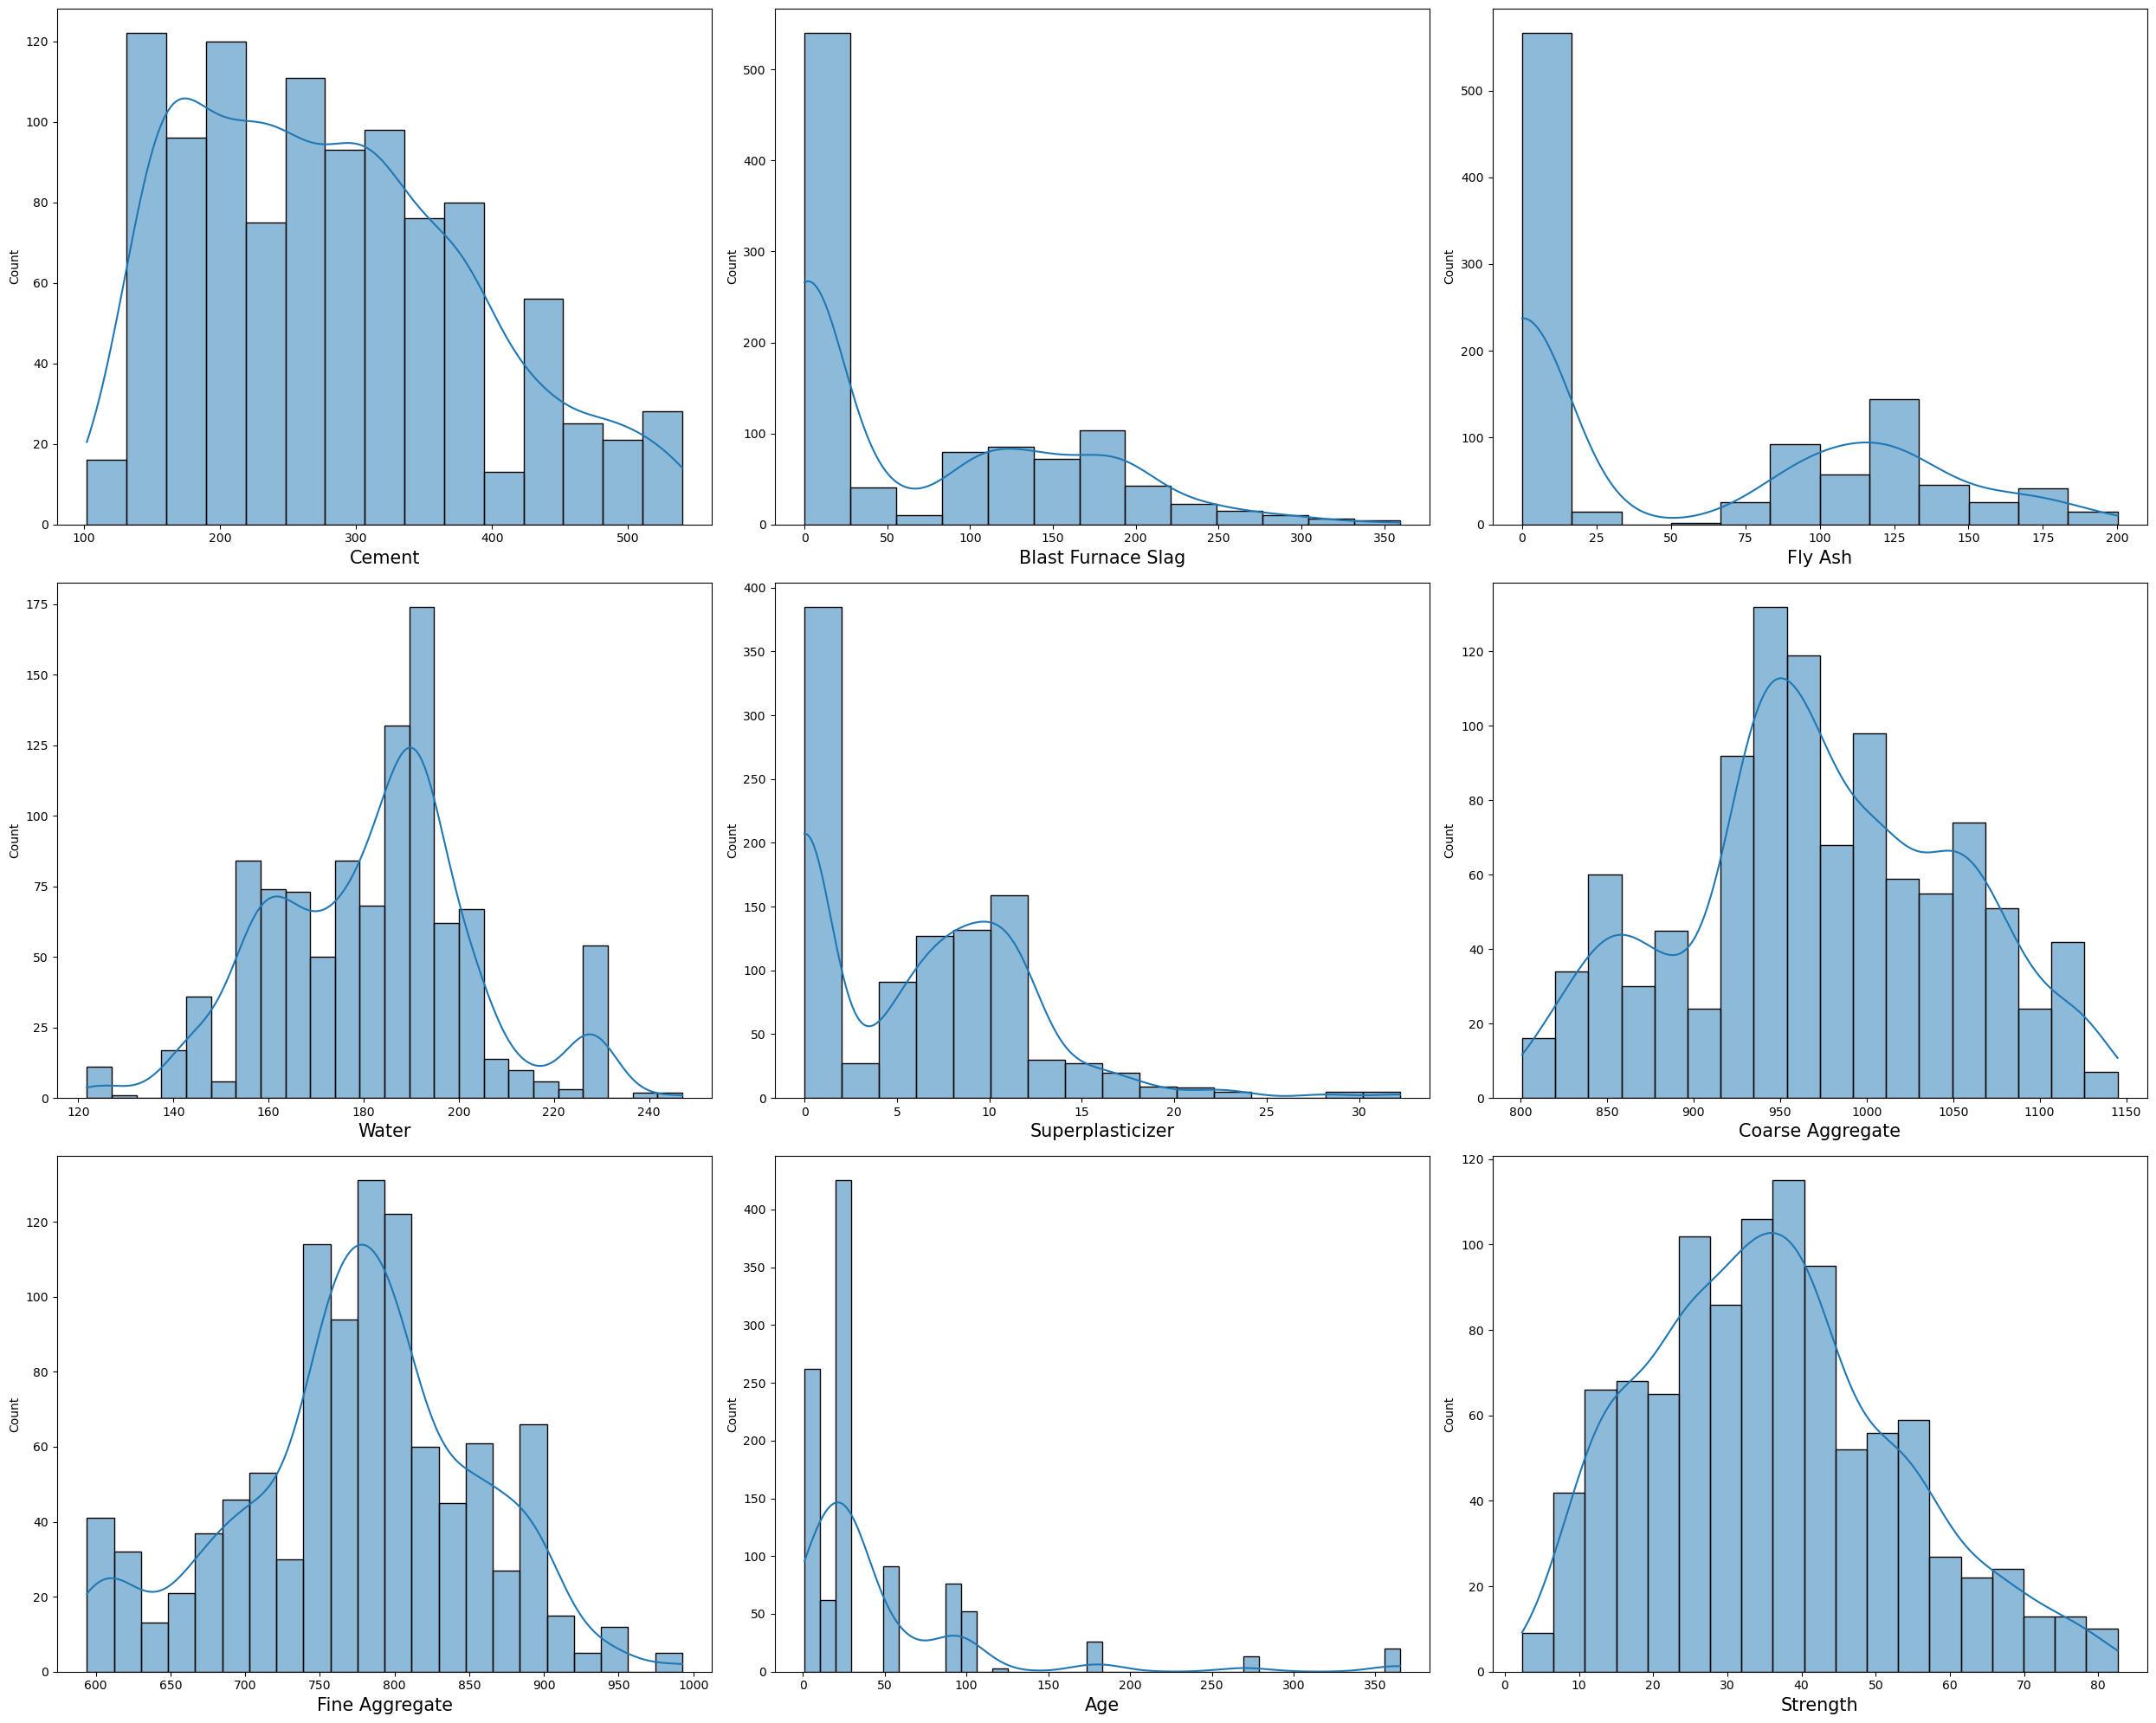

In [32]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in concrete.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(concrete[col],kde=True)
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [33]:
from mpl_toolkits.mplot3d import Axes3D

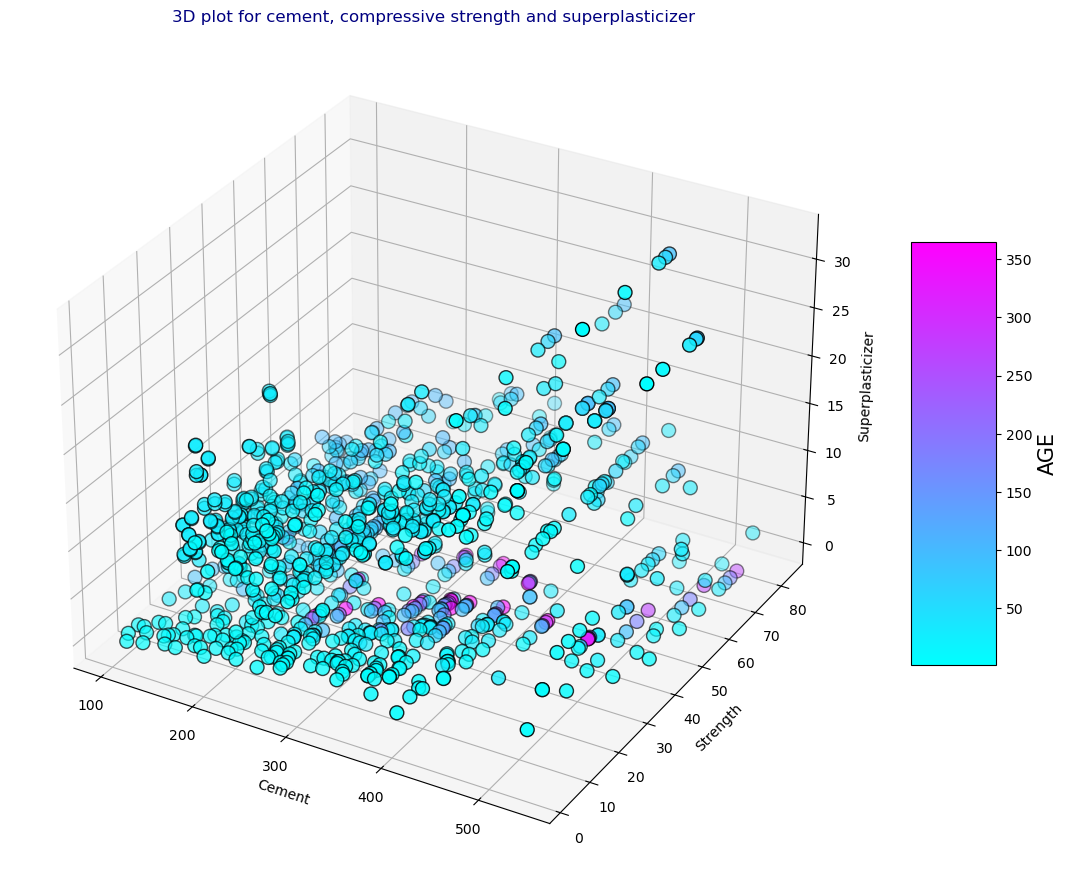

In [34]:
fig, ax = plt.subplots(figsize=(14, 11), subplot_kw={'projection': '3d'})
plot = ax.scatter(concrete["Cement"],
                  concrete["Strength"],
                  concrete["Superplasticizer"],
                  linewidth=1, edgecolor="k",
                  c=concrete["Age"], s=100, cmap="cool")

ax.set_xlabel("Cement")
ax.set_ylabel("Strength")
ax.set_zlabel("Superplasticizer")

lab = fig.colorbar(plot, shrink=.5, aspect=5)
lab.set_label("AGE", fontsize=15)

plt.title("3D plot for cement, compressive strength and superplasticizer", color="navy")
plt.show()

# Barplot for all the variables

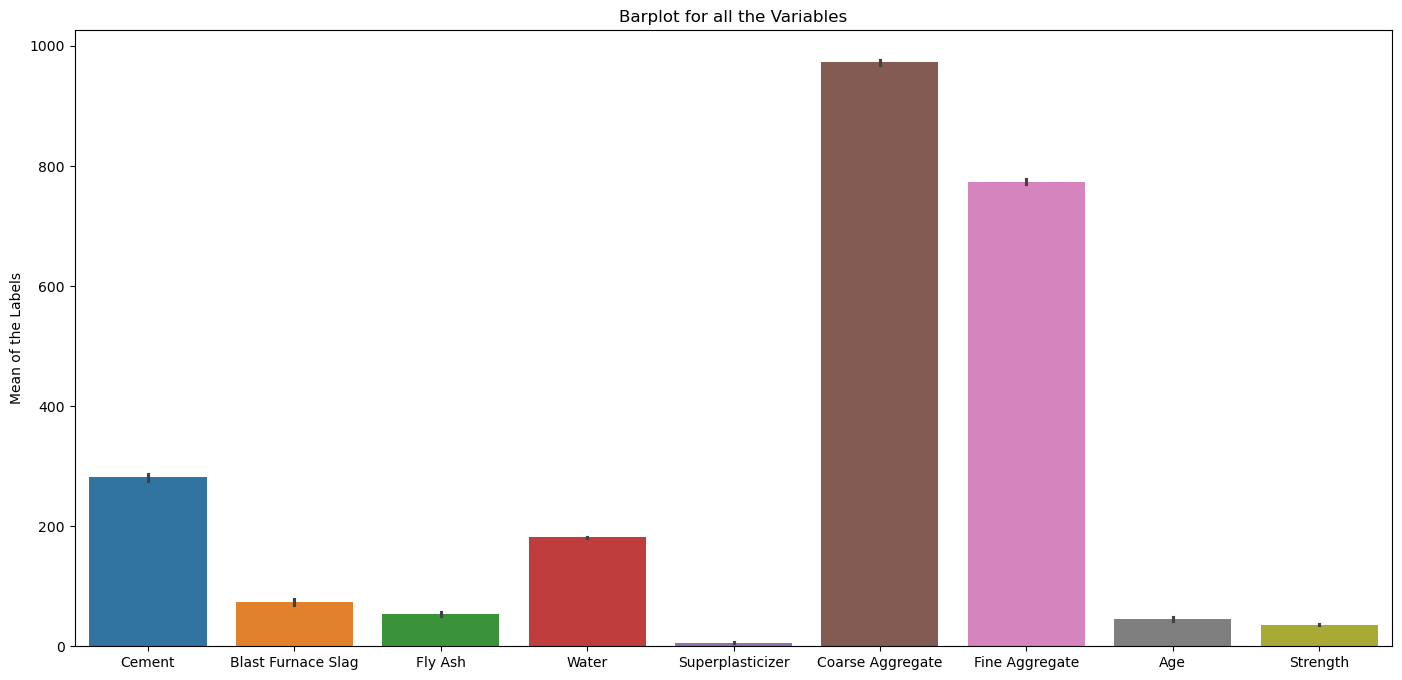

In [35]:
plt.figure(figsize=[17,8])
sns.barplot(concrete, estimator='mean')
plt.title('Barplot for all the Variables')
plt.ylabel('Mean of the Labels')
plt.show()

## Check the data if it has outliers are not

<Axes: >

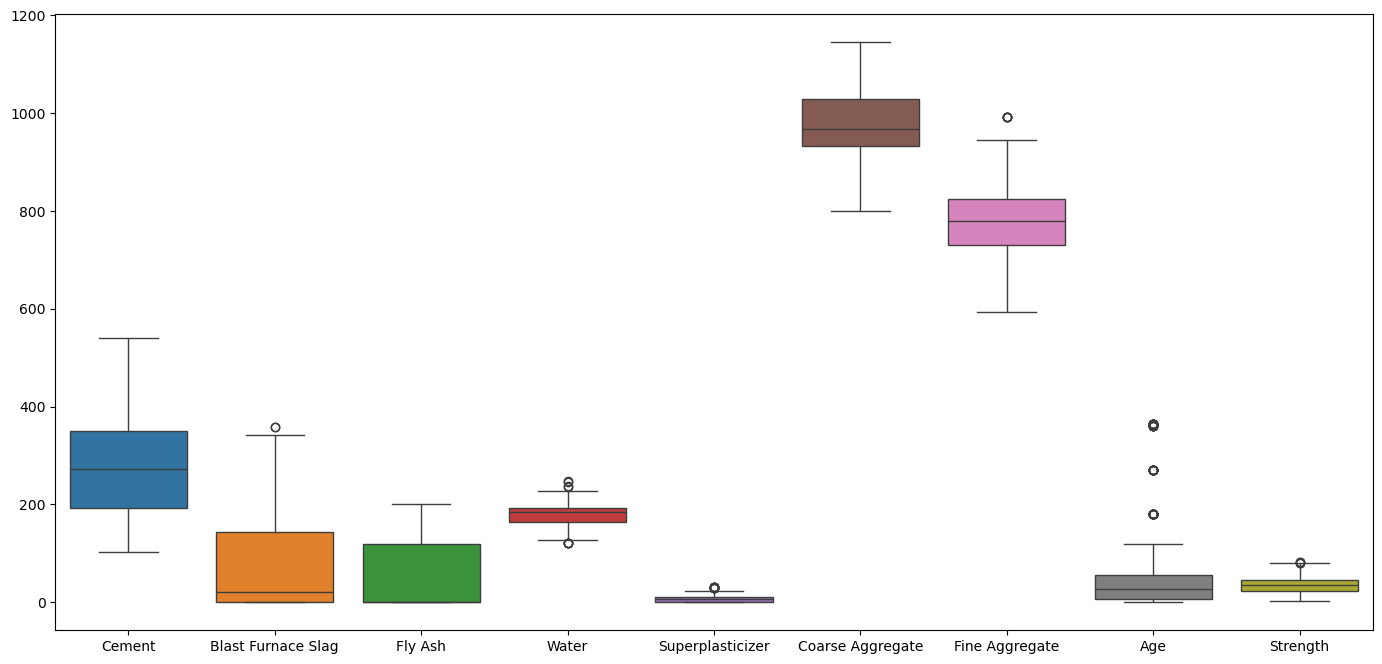

In [36]:
plt.figure(figsize=[17,8])
sns.boxplot(concrete)

In [37]:
concrete.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [38]:
np.round(concrete.corr(),2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
Blast Furnace Slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
Fly Ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
Water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
Superplasticizer,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
Coarse Aggregate,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
Fine Aggregate,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
Age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
Strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


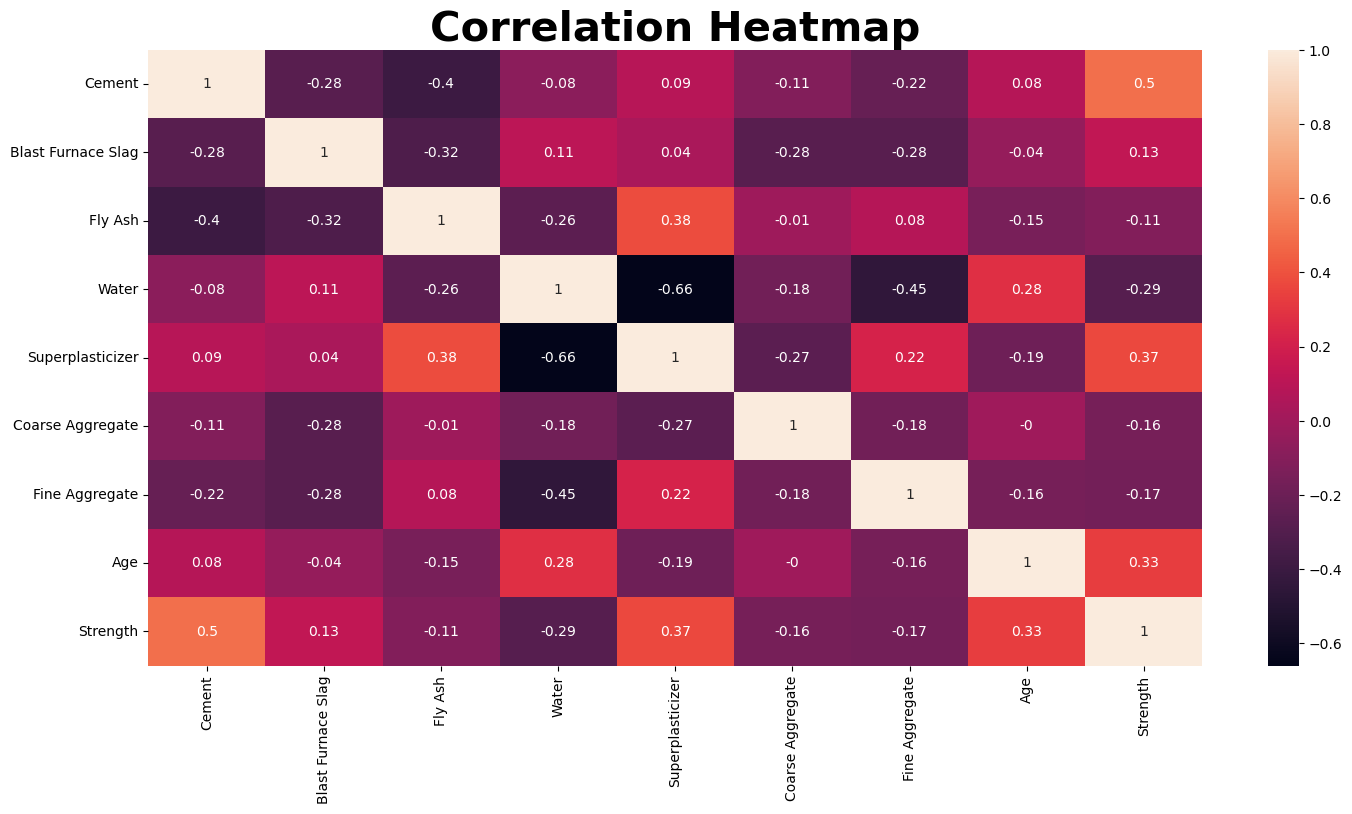

In [39]:
plt.figure(figsize=[17,8])
sns.heatmap(np.round(concrete.corr(),2),annot=True)
plt.title('Correlation Heatmap',fontdict={'fontsize': 30,
        'fontweight': 'bold',
        'color': 'k'})
plt.show()

In [40]:
concrete.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

# Splitting into dependent(y) and independent variables(X's)

In [41]:
X=concrete.drop('Strength',axis=1)
y=concrete.Strength

In [42]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [43]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

# Scaling the all the variables except dependent variable

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()

In [46]:
X_sc=sc.fit_transform(X)

In [47]:
X_sc=pd.DataFrame(X_sc,columns=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'])

In [48]:
X_sc.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


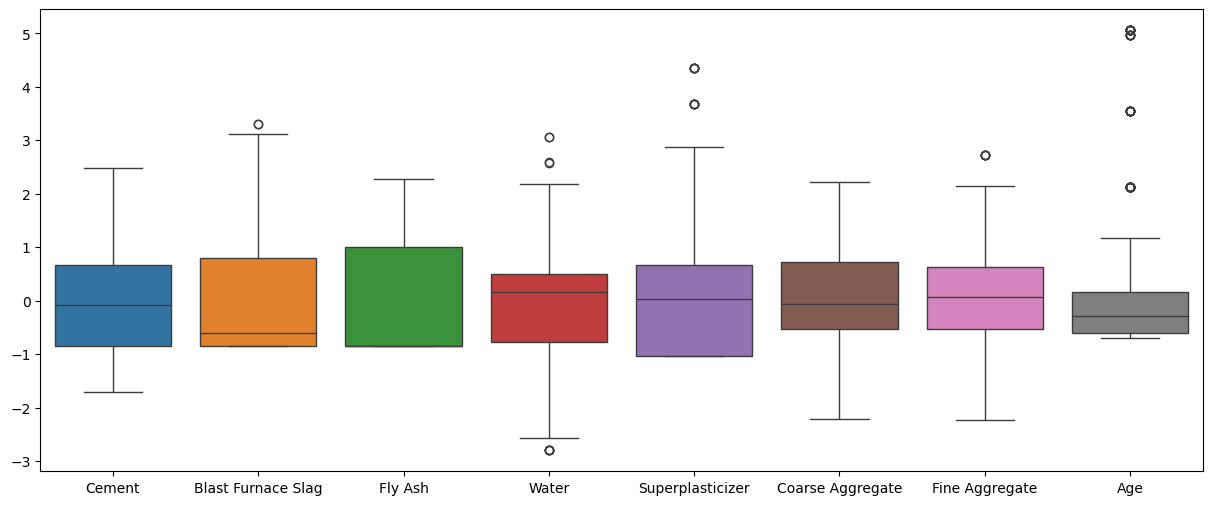

In [49]:
plt.figure(figsize=[15,6])
sns.boxplot(X_sc)
plt.show()

# MinMax Scaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
mm=MinMaxScaler()

In [52]:
X_mm=mm.fit_transform(X)

In [53]:
X_mm=pd.DataFrame(X_mm,columns=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'])

In [54]:
X_mm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


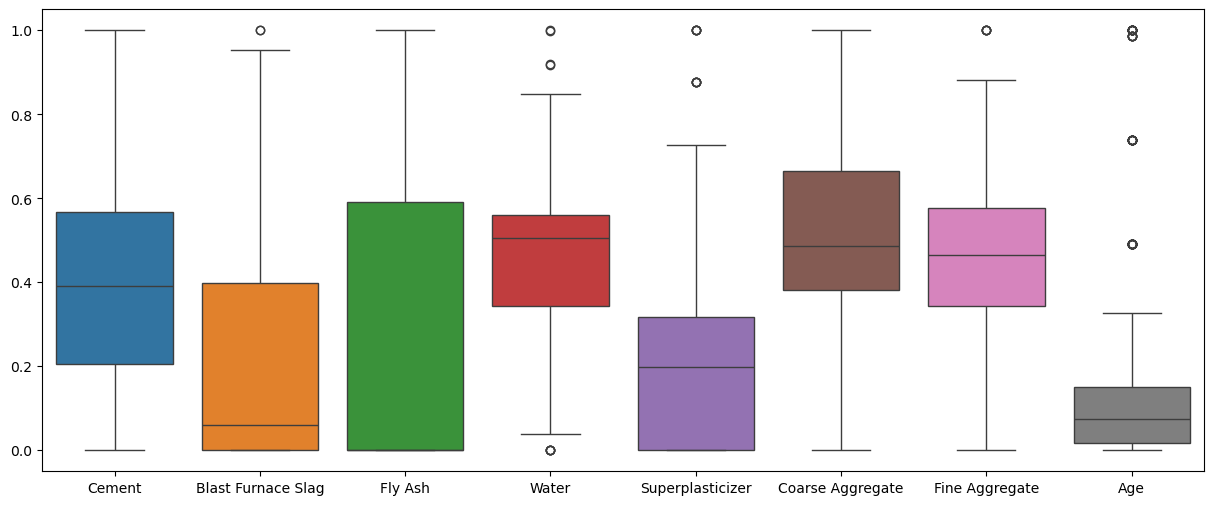

In [55]:
plt.figure(figsize=[15,6])
sns.boxplot(X_mm)
plt.show()

# Robust Scaler

In [56]:
from sklearn.preprocessing import RobustScaler

In [57]:
rb=RobustScaler()

In [58]:
X_rb=rb.fit_transform(X)

In [59]:
X_rb=pd.DataFrame(X_rb,columns=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'])

In [60]:
X_rb.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.694528,-0.153900,0.0,-0.848708,-0.382353,0.739220,-1.112305,0.000000
1,1.694528,-0.153900,0.0,-0.848708,-0.382353,0.893224,-1.112305,0.000000
2,0.378113,0.842952,0.0,1.586716,-0.627451,-0.369610,-1.993552,4.938776
3,0.378113,0.842952,0.0,1.586716,-0.627451,-0.369610,-1.993552,6.877551
4,-0.471372,0.772298,0.0,0.258303,-0.627451,0.106776,0.494358,6.775510


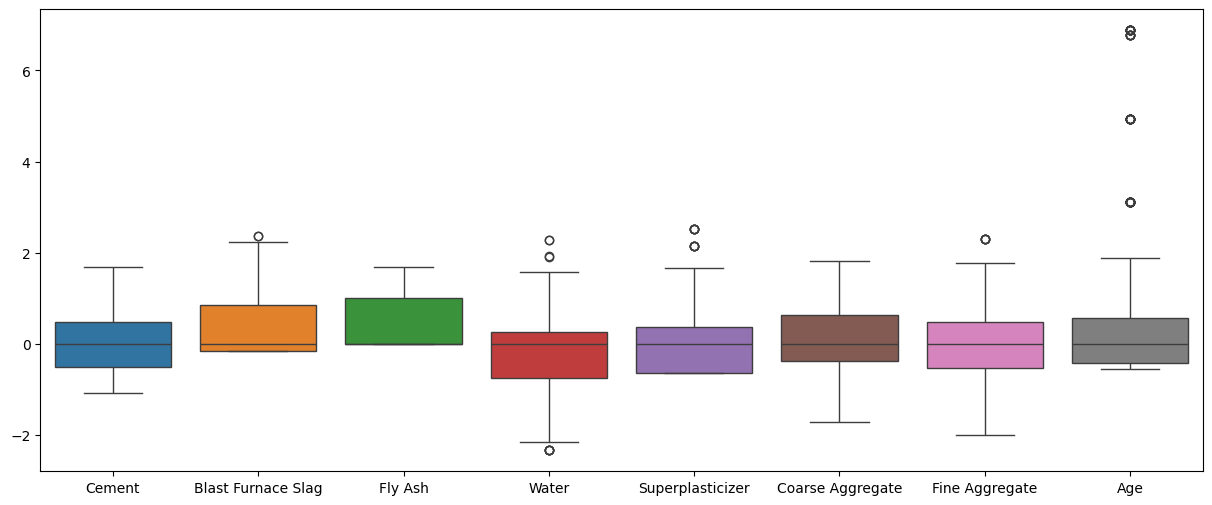

In [61]:
plt.figure(figsize=[15,6])
sns.boxplot(X_rb)
plt.show()

# let's check how our features are related to the target column

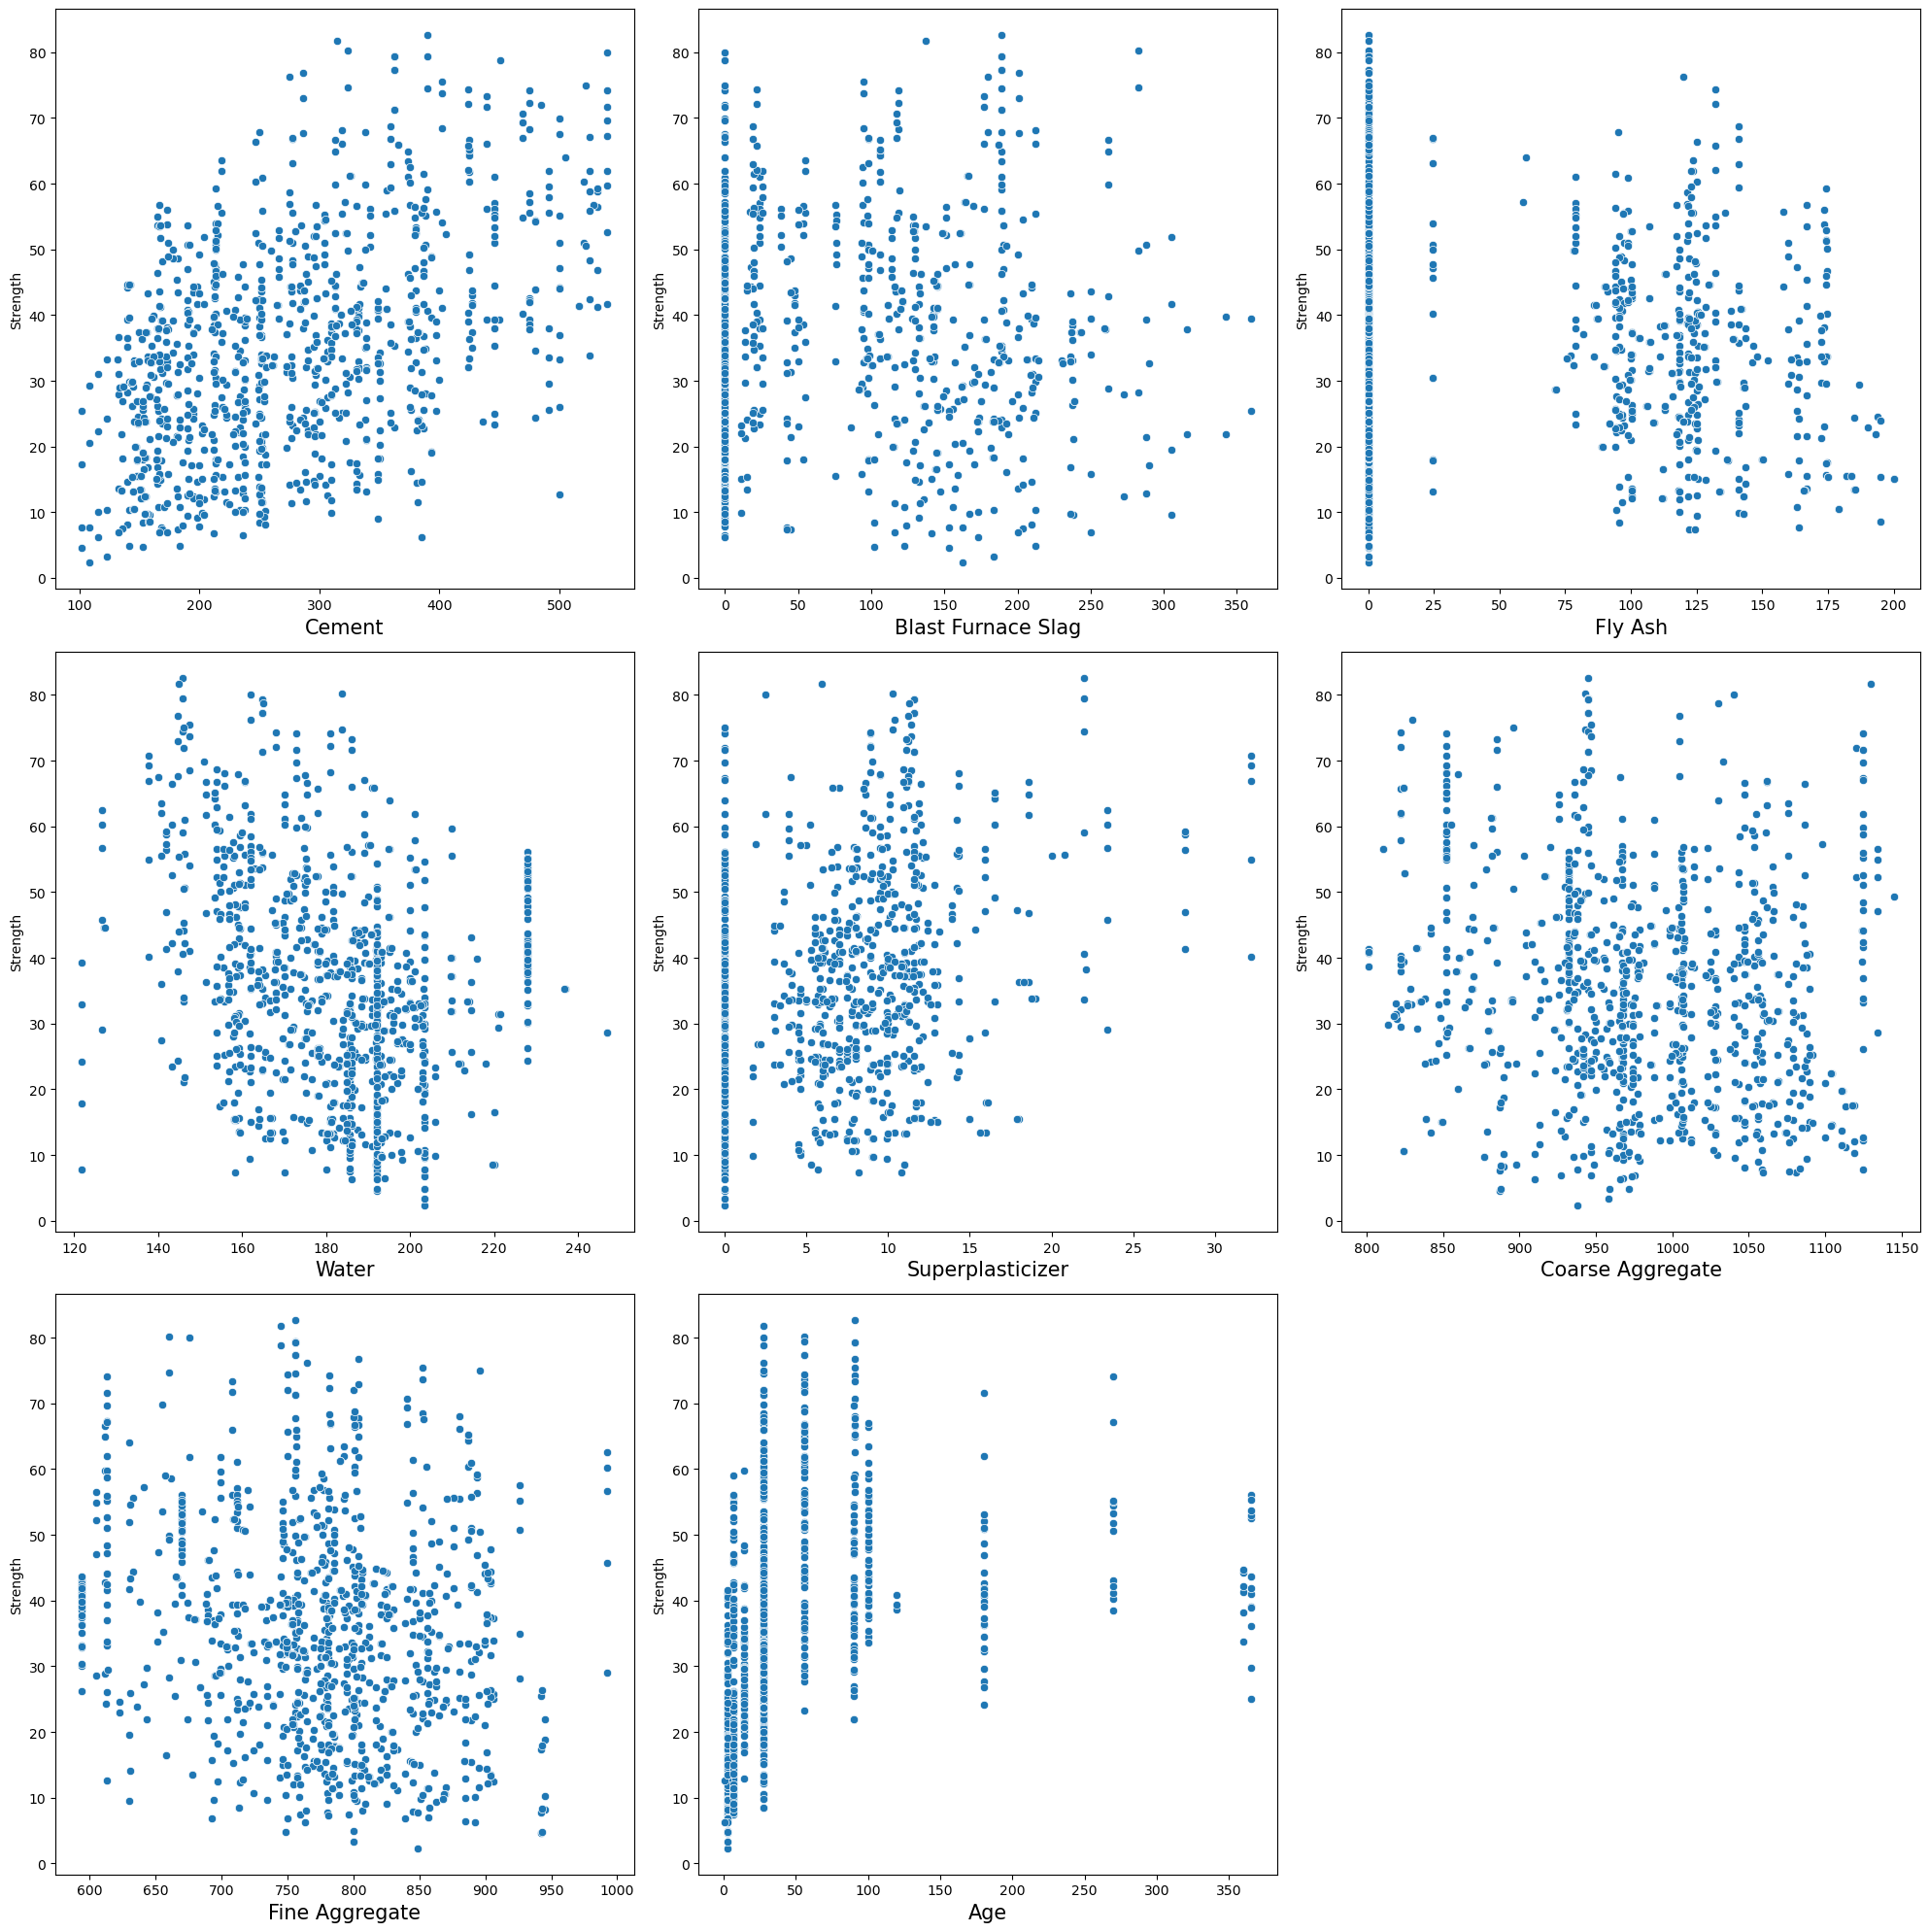

In [62]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(x=X[col], y=y)
        plt.xlabel(col, fontsize = 15) 
    plotnumber += 1
plt.tight_layout()
plt.show()

## Model Building

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [64]:
# Building the ANN
model = Sequential()
# Input layer
model.add(Dense(128, activation='relu',input_shape=(X_mm.shape[1],)))
model.add(BatchNormalization())
# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
# Hidden layers
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
# Output layer
model.add(Dense(1, activation='linear'))
# Compiling the ANN
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])#['mean_absolute_error', 'mean_squared_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [65]:
history = model.fit(X_mm, y, epochs=250, batch_size=32, validation_data=(X_mm,y))

Epoch 1/250
33/33 [==============================] - 4s 19ms/step - loss: 1502.8048 - mse: 1502.8048 - val_loss: 1542.7980 - val_mse: 1542.7980
Epoch 2/250
33/33 [==============================] - 0s 6ms/step - loss: 1421.1672 - mse: 1421.1672 - val_loss: 1487.9432 - val_mse: 1487.9432
Epoch 3/250
33/33 [==============================] - 0s 7ms/step - loss: 1354.2235 - mse: 1354.2235 - val_loss: 1394.1771 - val_mse: 1394.1771
Epoch 4/250
33/33 [==============================] - 0s 6ms/step - loss: 1291.8424 - mse: 1291.8424 - val_loss: 1287.7693 - val_mse: 1287.7693
Epoch 5/250
33/33 [==============================] - 0s 6ms/step - loss: 1225.0813 - mse: 1225.0813 - val_loss: 1165.1034 - val_mse: 1165.1034
Epoch 6/250
33/33 [==============================] - 0s 6ms/step - loss: 1158.8873 - mse: 1158.8873 - val_loss: 1034.8203 - val_mse: 1034.8203
Epoch 7/250
33/33 [==============================] - 0s 6ms/step - loss: 1093.7904 - mse: 1093.7904 - val_loss: 917.0783 - val_mse: 917.0783


In [66]:
loss, mae = model.evaluate(X_mm, y)

33/33 [==============================] - 0s 2ms/step - loss: 7.5331 - mse: 7.5331


In [67]:
print(f'Test MAE: {mae}')

Test MAE: 7.5330610275268555


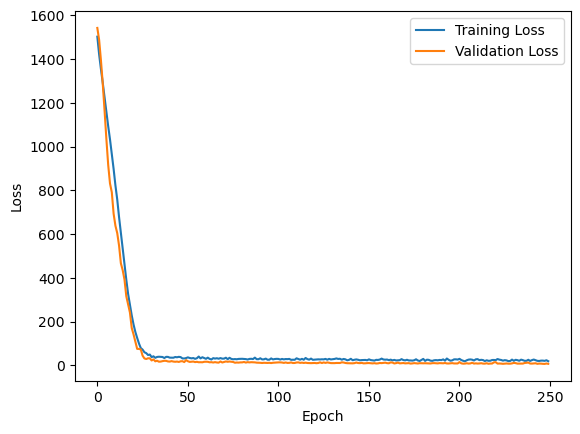

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

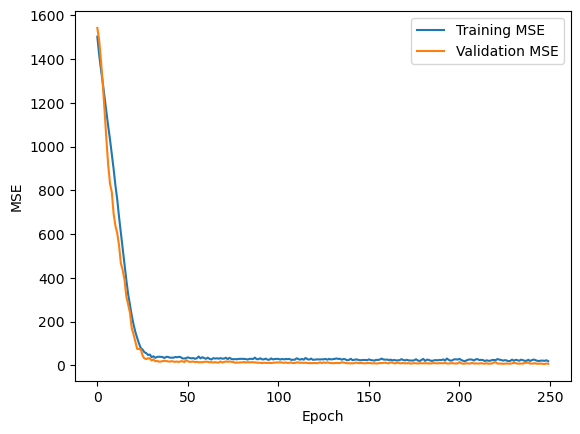

In [69]:
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [70]:
pred=model.predict(X_mm)

33/33 [==============================] - 0s 2ms/step


In [71]:
pred=pd.DataFrame(pred)

In [72]:
pred=pred.rename(columns={0:'Strength'})

In [73]:
pred.Strength.head()

0    73.321091
1    74.025925
2    38.995461
3    39.316334
4    42.682930
Name: Strength, dtype: float32

In [74]:
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [76]:
# Model Evaluation Metrics
MAE = (mean_absolute_error(y,pred))
RMSE = np.sqrt(mean_squared_error(y,pred))
EVS = explained_variance_score(y,pred)
print('EVALUATION METRICS')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE}\nRoot Mean Squared Error (RMSE):\t\t{RMSE}\nExplained Variance Score:\t\t{EVS}")

EVALUATION METRICS
-----------------------------
Mean Absolute Error (MAE):		2.010330205982171
Root Mean Squared Error (RMSE):		2.744642384868974
Explained Variance Score:		0.9741942174136506


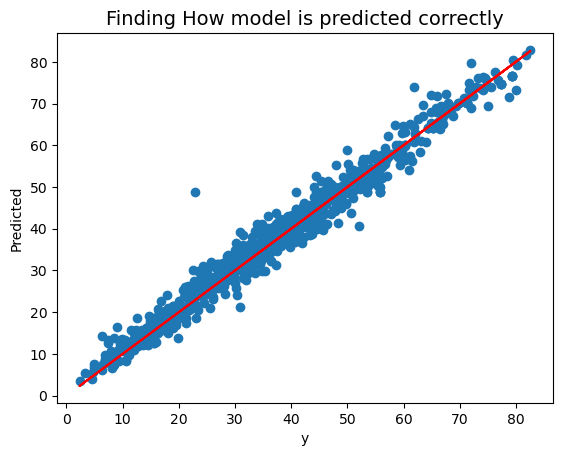

In [77]:
plt.title('Finding How model is predicted correctly',fontdict={'fontsize':14})
# Plot Model Predictions (Scatter)
plt.scatter(y,pred)
# Plot Perfect predictions (Line)
plt.plot(y,y,'r')
plt.xlabel('y')
plt.ylabel('Predicted')
plt.show()

In [78]:
model.save('concrete_model.h5')

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
